# 계층적 군집

**Hierarchical Clustering**

데이터분석(3-2.계층군집)-정훈님.ipynb를 변경해 한 번에 dendrogram 추출

## #01. 패키지

모델 : scipy.cluster.AgglomerativeClustering

거리계산 : scipy.cluster.hierarchy.linkage

시각화 : scipy.cluster.hierarchy.dendrogram

평가 : sklearn.metrics.silhouette_score , silhouette_samples, yellowbrick.cluster.KElbowVisualizer

In [1]:
import sys
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas import read_excel, DataFrame

# sklearn은 AgglomerativeClustering() 함수를 제공
from sklearn.cluster import AgglomerativeClustering

# 표준화
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터

In [3]:
origin = read_excel("행정동병합최종.xlsx")
origin.head()

,시도명,시군구코드,시군구명,행정동코드,행정동코드_수정,읍면동명,생성일자,말소일자,지하철역_수,의료기관_수,...,보육시설수,세대당공원면적minmax,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,그린지수minmax
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,0,0,11,...,4,0.352898,0,32,0,3,0.038298,0.120179,0.035322,0.187151
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,0,2,75,...,0,0.063554,0,27,0,12,0.093504,0.033721,0.131414,0.033704
2,서울특별시,11110,종로구,1111054000,11110540,삼청동,19880423,0,0,11,...,3,1.000000,0,16,0,5,0.077132,0.078692,0.040614,0.530328
3,서울특별시,11110,종로구,1111055000,11110550,부암동,19880423,0,0,4,...,3,0.000000,10,34,0,5,0.024572,0.104086,0.043385,0.530328
4,서울특별시,11110,종로구,1111056000,11110560,평창동,19880423,0,0,15,...,3,0.001192,10,54,0,5,0.007649,0.489879,0.018995,0.530960


## #03. 데이터 전처리

### 필요한 데이터만 추출

In [4]:
origin1=origin.filter(['읍면동명','그린지수minmax','여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax','접근성지수minmax'])
origin1.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.187151,0.038298,0.120179,0.035322
1,사직동,0.033704,0.093504,0.033721,0.131414


#### 지수의 결측치 확인 및 처리

In [5]:
origin1.isna().sum()
origin2=origin1.copy()
origin2.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.187151,0.038298,0.120179,0.035322
1,사직동,0.033704,0.093504,0.033721,0.131414


#### 이상치(`inf`) 유무 확인

In [6]:
is_inf = origin2.isin([np.inf, -np.inf])

# 각 column별로 -inf 또는 inf 값을 포함하고 있는 행 수를 확인
inf_count = is_inf.sum()

# 결과 출력
inf_count

읍면동명                      0
그린지수minmax                0
여가생활지수minmax              0
사회적약자_지원_인프라_밀집도minmax    0
접근성지수minmax               0
dtype: int64

In [7]:
origin2.columns

Index(['읍면동명', '그린지수minmax', '여가생활지수minmax', '사회적약자_지원_인프라_밀집도minmax',
       '접근성지수minmax'],
      dtype='object')

### 분석용 데이터 스케일링 및 라벨링

이미 MinMax로 스케일링된 값들이므로 제외

> 전원 수치 데이터임으로 별도의 라벨링이 필요 없다고 판단.

## #04. 계층 군집 수행

### sklearn 패키지 사용

n_clusters : 찾아야 할 클러스터 수(earlystopping과 유사)

affinity : 클러스터 간 거리 측정 방법(euclidean, cityblock, manhattan, cosine)

linkage : ward(기본값), complete, average, single

compute_distances : 노드간의 거리 계산값을 저장할지 여부(시각화를 위해서는 True를 필수 적용)

`n_clusters`은 K-Means에서 엘보우 그래프로 확인된 `4`, 또는 새로 설정한 `6`을 사용.

#### n_clusters=`6`

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19184\3264282694.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_temp_1['labels'] = clustering.labels_
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19184\3264282694.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_temp_1['labels'] = clustering.labels_
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19184\3264282694.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

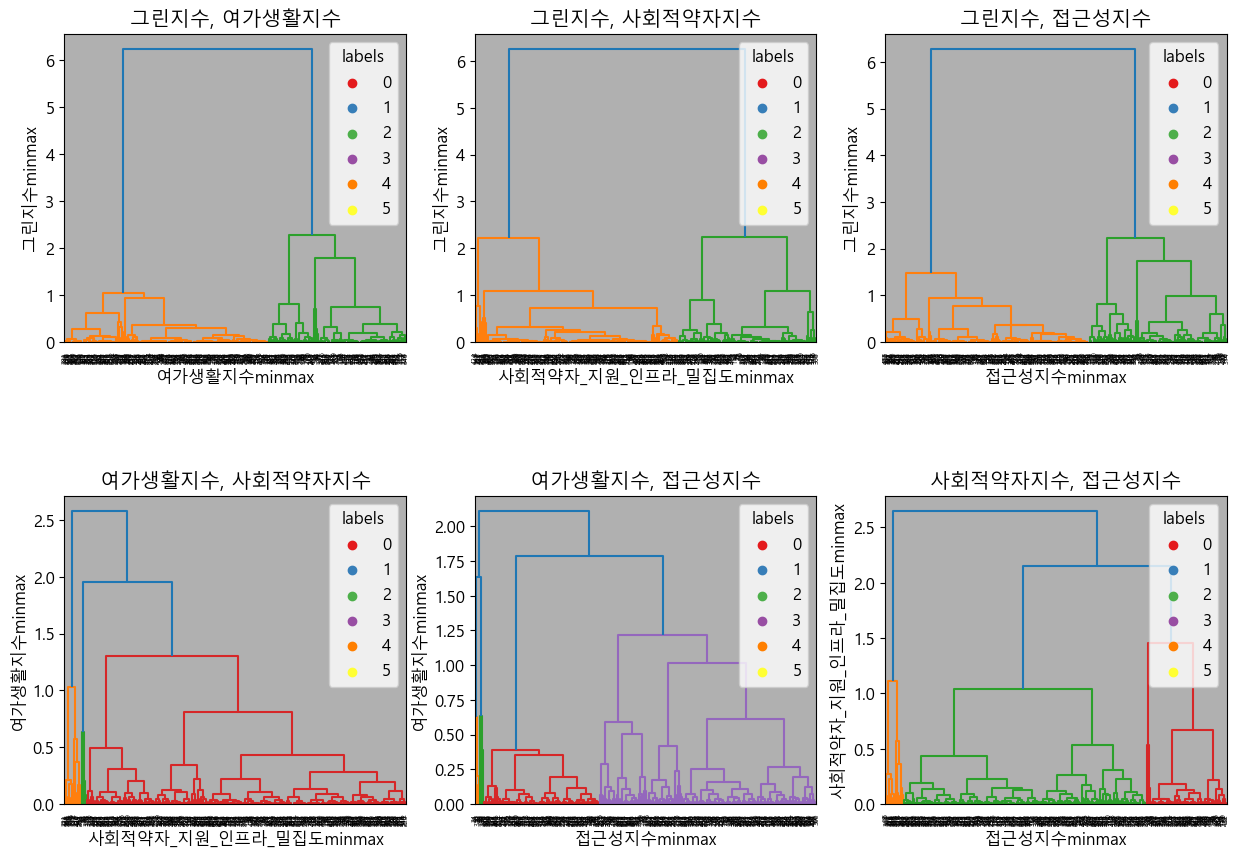

In [12]:
# 사용할 열 조합 및 레이블 정의
column_combinations = [
    (['그린지수minmax', '여가생활지수minmax'], '그린지수, 여가생활지수'),
    (['그린지수minmax', '사회적약자_지원_인프라_밀집도minmax'], '그린지수, 사회적약자지수'),
    (['그린지수minmax', '접근성지수minmax'], '그린지수, 접근성지수'),
    (['여가생활지수minmax', '사회적약자_지원_인프라_밀집도minmax'], '여가생활지수, 사회적약자지수'),
    (['여가생활지수minmax', '접근성지수minmax'], '여가생활지수, 접근성지수'),
    (['사회적약자_지원_인프라_밀집도minmax', '접근성지수minmax'], '사회적약자지수, 접근성지수')
]

# 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2x3 격자 형태의 서브플롯 생성, 크기는 15x10
# 서브플롯 간의 수직 간격 조절
fig.subplots_adjust(hspace=0.5)

# 열 조합에 대해 반복
for i, (columns, label) in enumerate(column_combinations):
# 서브플롯 중 현재 조합에 해당하는 서브플롯을 선택
    ax = axes[i // 3, i % 3]  # 현재 서브플롯 선택
    
    # 데이터 복사 및 필요한 열 선택
    origin_temp = origin2.copy()
# '읍면동명'과 선택한 열을 포함한 데이터프레임
    origin_temp_1 = origin_temp[['읍면동명'] + columns]  
# 선택한 열만 포함한 데이터프레임
    origin_temp_3 = origin_temp[columns]  
    
    # 계층적 클러스터링 모델 생성 및 학습
    ac = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward', compute_distances=True)
    clustering = ac.fit(origin_temp_3)
    
    # 계층적 클러스터링 결과를 위한 변수 초기화
    counts = np.zeros(clustering.children_.shape[0])
    n_samples = len(clustering.labels_)
    
    # 클러스터 병합 과정에서 노드 수 계산
    for j, merge in enumerate(clustering.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # 리프 노드인 경우
            else:
                current_count += counts[child_idx - n_samples]
        counts[j] = current_count
    
    # 덴드로그램 생성을 위한 링크리지 매트릭스 구성
    linkage_matrix = np.column_stack([clustering.children_, clustering.distances_, counts]).astype(float)
    
    # 덴드로그램 그리기
    dendrogram(linkage_matrix, ax=ax)
    ax.set_title(label)  # 그래프 제목 설정
    
    # 클러스터링 결과를 데이터프레임에 추가
    origin_temp_1['labels'] = clustering.labels_
    
    # 산점도 그리기
    sb.scatterplot(data=origin_temp_1, x=columns[1], y=columns[0], hue='labels', palette='Set1', ax=ax)
    ax.grid()  # 그리드 추가

plt.show()  # 서브플롯을 화면에 출력

